# **DATA CLEANING**

In [33]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

## Load data

In [34]:
# We have no missing values, this wounldn't work
na_vals = ['NA', 'Missing']

df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent', na_values=na_vals)
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [35]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows',  85)


In [36]:
schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...
Employment,Which of the following best describes your cur...
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."
EdLevel,Which of the following best describes the high...


In [37]:
df.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,I

In [38]:
df['Hobbyist'].value_counts()

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Missing Values')

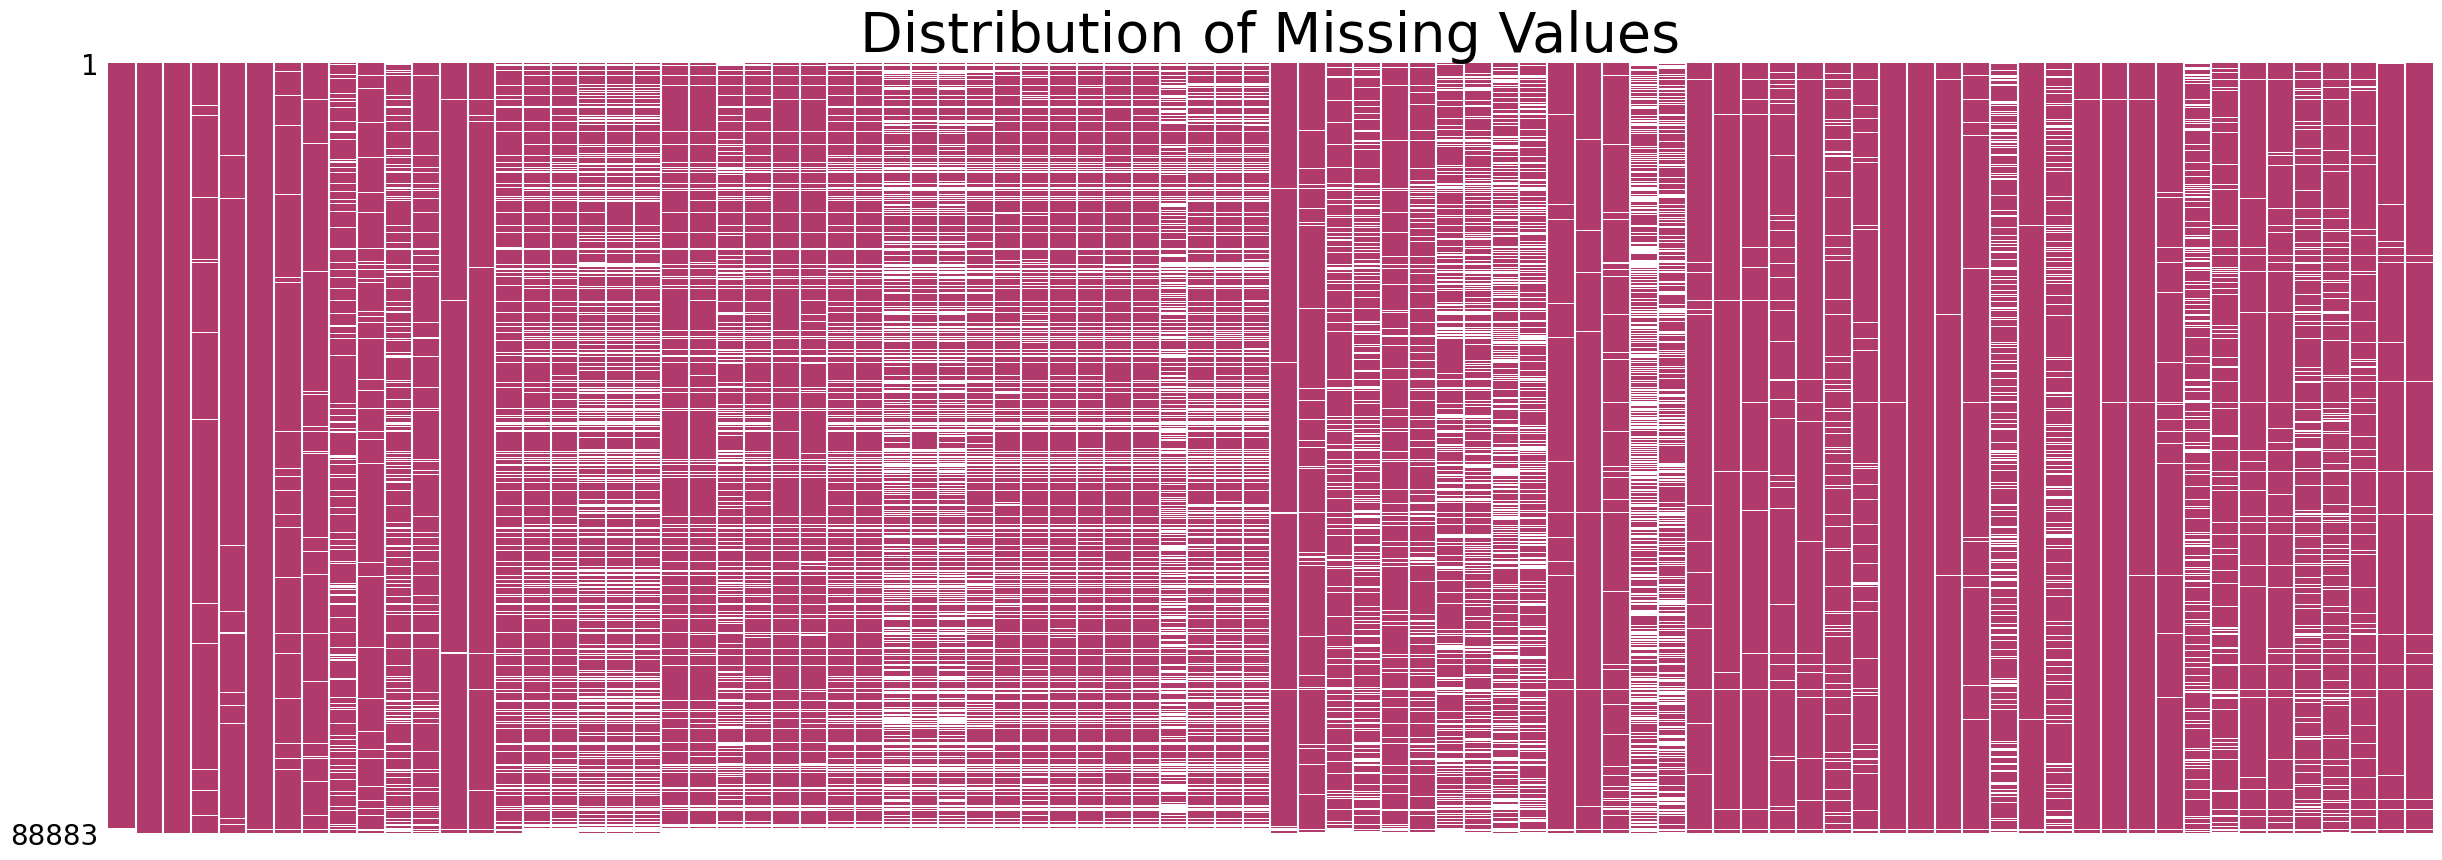

In [39]:
msno.matrix(df, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   OpenSourcer             88883 non-null  object 
 3   OpenSource              86842 non-null  object 
 4   Employment              87181 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  OrgSize                 71791 non-null  object 
 11  DevType                 81335 non-null  object 
 12  YearsCode               87938 non-null  object 
 13  Age1stCode              87634 non-null  object 
 14  YearsCodePro            74331 non-null  obj

In [41]:
df['YearsCode'].head(10)

Respondent
1       4
2     NaN
3       3
4       3
5      16
6      13
7       6
8       8
9      12
10     12
Name: YearsCode, dtype: object

In [42]:
# df['YearsCode'] = df['YearsCode'].astype(float)

In [43]:
# Let's check all unique values in the column 
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [44]:
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
#df['YearsCode'].replace('More than 50 years', 50, inplace=True)

/tmp/ipykernel_43215/2942813467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCode'].replace('Less than 1 year', 0, inplace=True)


In [45]:
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 0, '30', '9', '26', '40', '19', '15', '20', '28',
       '25', '1', '22', '11', '33', '50', '41', '18', '34', '24', '23',
       '42', '27', '21', '36', '32', '39', '38', '31', '37',
       'More than 50 years', '29', '44', '45', '48', '46', '43', '47',
       '49'], dtype=object)

In [46]:
df['YearsCode'].replace('More than 50 years', 51, inplace=True)

/tmp/ipykernel_43215/2701027061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCode'].replace('More than 50 years', 51, inplace=True)


In [47]:
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 0, '30', '9', '26', '40', '19', '15', '20', '28',
       '25', '1', '22', '11', '33', '50', '41', '18', '34', '24', '23',
       '42', '27', '21', '36', '32', '39', '38', '31', '37', 51, '29',
       '44', '45', '48', '46', '43', '47', '49'], dtype=object)

In [48]:
df['YearsCode'] = df['YearsCode'].astype(float)

In [49]:
# df.dtypes
df['YearsCode'].mean()

11.662114216834588

In [50]:
df['YearsCode'].median()

9.0

In [51]:
df['YearsCode'].mode()

0   5.00
Name: YearsCode, dtype: float64

In [52]:
pwd

'/home/kimz/Documents/cory_class_2024/tut_3'